![imagen](./img/seaborn.png)


# Exploratory Data Analysis with Seaborn
Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), en primer lugar porque es imposible abarcarlo todo, y en segundo lugar porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, primero tendremos que identificar el tipo de los datos y cuántas variables vamos a representar
- Una variable numérica
- Una variable categórica
- Dos variables numéricas
- Tres o más variables numéricas
- Dos variables categóricas
- Variables numéricas y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas, lo tendremos mucho más fácil.

Most used:

* heat map
* histogram
* boxplot

https://www.data-to-viz.com/

In [ ]:
# !pip install --upgrade seaborn

In [74]:
# Importamos todos los paquetes que vayamos a necesitar
# from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Cargamos las features en un DataFrame:
iris_df = pd.read_csv("data/iris.csv",index_col=0)
boston_df = pd.read_csv("data/boston.csv",index_col=0)

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("data/titanic.csv", sep="\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("data/supermarket_sales.csv")

# Cargamos dataset de suicidios
suicid_df = pd.read_csv("data/suicide.csv")

In [78]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
iris_df.head()

In [ ]:
suicid_df.head()

# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:

![imagen](./img/dtypes.png)

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Este tipo de gráficas nos sirven para ver la distribución de los datos, donde se concentran más, ¿es dispersa? ¿tiene asimétrica? ¿por qué? ¿Hay outliers?

In [ ]:
titanic_df['Fare'].mode()
# titanic_df['Fare'].value_counts().idxmax()
# titanic_df.groupby('Fare').size().sort_values(ascending=False).index[0]

# index[0]: This returns the index of the first element in the sorted Series, 
# which corresponds to the most frequently occurring value in the ‘Fare’ column.

In [ ]:
titanic_df['Fare'].min()
# titanic_df['Fare'].sort_values().iloc[0]
# titanic_df['Fare'].nsmallest(1).iloc[0] 

# #By adding [1] after nsmallest(1), we are selecting the second smallest value in the column, 
# which is the value at index 1 of the resulting Series.

In [ ]:
titanic_df['Fare'].max()
# titanic_df['Fare'].nlargest(1).iloc[0]
# titanic_df['Fare'].sort_values(ascending=False).iloc[0]

Plot the distribution of the ‘Fare’ column in the ‘titanic_df’ dataframe using seaborn:


In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"], hist = False);

In [ ]:
# using histplot and displot :
sns.kdeplot(titanic_df['Fare'], shade=True)
# sns.histplot(titanic_df['Fare'], kde=True)
# sns.displot(titanic_df['Fare'], kind='kde')

#### Histograma
También podemos verlo en un histograma

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad anterior. La diferencia es que ahora el eje y es un conteo y no la probabilidad de aparición de los valores de la variable.

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
             kde=False,
             color='g',
             bins=100);
# plt.xlim(0,30)

In [ ]:
# Using the kdeplot() method: 
sns.kdeplot(titanic_df['Fare'], shade=True)
# Using the histplot() method: 
sns.histplot(titanic_df['Fare'], kde=True)
# Using the displot() method: 
sns.displot(titanic_df['Fare'], kind='kde')

#### Histograma + Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"});

In [ ]:
# Using the kdeplot() method: 
sns.kdeplot(titanic_df['Fare'], shade=True, color='k', lw=3, label='KDE')
# Using the histplot() method: 
sns.histplot(titanic_df['Fare'], kde=True, color='g', alpha=1, linewidth=3, histtype='step')
# Using the displot() method: 
sns.displot(titanic_df['Fare'], kind='kde', color='k', lw=3, label='KDE')

Otra manera muy visual de ver la concentración de los valores es mediante el argumento `rug`

The rug argument in sns.distplot() is used to add small vertical lines to the plot that represent the location of each observation in the data. These lines are called “rugs” because they resemble the tassels on a rug. The rug argument is a boolean value that defaults to False. When set to True, it adds the rug to the plot.

rug=True 
adds the rug to the plot. The bins argument specifies the number of bins to use for the histogram, and the xlim method sets the limits of the x-axis to be between 0 and 100.

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            rug=True,
            bins=100)
plt.xlim(0, 100);

In [ ]:
# kdeplot() method: 
sns.kdeplot(titanic_df['Fare'], shade=True)
# Using the histplot() method: 
sns.histplot(titanic_df['Fare'], kde=True)
# Using the displot() method: 
sns.displot(titanic_df['Fare'], kind='kde')


#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

In [ ]:
p_0 = np.percentile(titanic_df["Fare"], 0) #Q0 #Min
p_25 = np.percentile(titanic_df["Fare"], 25) #Q1
p_50 = np.percentile(titanic_df["Fare"], 50) #Q2 #Mediana
p_75 = np.percentile(titanic_df["Fare"], 75) #Q3
p_100 = np.percentile(titanic_df["Fare"], 100) #Q4 #Max

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(titanic_df["Fare"].mean(),2) )

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(titanic_df["Fare"], color="sienna");
# plt.xlim(0,50)

![imagen](./img/boxplot.png)

In [ ]:
# Using the boxplot() method: 
titanic_df.boxplot(column='Fare')
# Using the catplot() method: 
sns.catplot(x='Fare', kind='box', data=titanic_df, color='sienna', height=5, aspect=2)


#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja

In [ ]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df["Fare"], color='deeppink');

In [ ]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df["Fare"], color='lightseagreen', bw=.5, inner="stick");

### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [ ]:
titanic_df['Embarked'].unique()

In [ ]:
titanic_df['Embarked'].value_counts()

In [ ]:
# Using the unique() method: 
titanic_df['Embarked'].unique()
# Using the value_counts() method: 
titanic_df['Embarked'].value_counts().index.tolist()
# Using the groupby() method: 
titanic_df.groupby('Embarked').size().reset_index(name='counts')['Embarked'].tolist()


'''

groupby('Embarked'): 
This groups the rows of the titanic_df dataframe by the unique values in the ‘Embarked’ column.
size(): 
This returns a Series containing the count of each group.
reset_index(name='counts'):
 This resets the index of the resulting Series and renames the column to ‘counts’.
['Embarked']:
 This selects the ‘Embarked’ column of the resulting DataFrame.
tolist(): 
This converts the values in the ‘Embarked’ column to a list.

Therefore,returns a list of the unique values
 in the ‘Embarked’ column.'''

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(titanic_df["Embarked"]);

In [ ]:
# Using the countplot() method: 
sns.countplot(x='Embarked', data=titanic_df)
# Using the catplot() method: 
sns.catplot(x='Embarked', kind='count', data=titanic_df, height=5, aspect=2)

#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

In [ ]:
# conteo

In [ ]:
market_df.head()

In [ ]:
market_df['Product line'].value_counts(ascending=False)

In [ ]:
# Using the value_counts() method: 
market_df['Product line'].value_counts(ascending=False)
# Using the groupby() method: 
market_df.groupby('Product line').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [ ]:
'''horizontal bar plot of the counts of each unique value in the ‘Product line’ column 
The value_counts() method is used to count the values in the column,
 and the resulting Series is plotted using the hlines() and plot() methods of matplotlib.'''

conteo = market_df['Product line'].value_counts(ascending=False)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=150,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o");


In [ ]:
# Using the countplot() method: 
sns.countplot(y='Product line', data=market_df, order=market_df['Product line'].value_counts(ascending=False).index, color='skyblue')
# Using the barplot() method:
# sns.barplot(x='Product line', y=market_df['Product line'].value_counts(ascending=False).index, data=market_df, color='skyblue')

#### Donut chart/Pie chart

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

In [ ]:
titanic_df["Embarked"].value_counts()

In [ ]:
import matplotlib.pyplot as plt
 
# create data
data = titanic_df["Embarked"].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle);

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf();

In [ ]:
# USING VERTICAL CHART 
plt.figure(figsize=(8,8))
plt.barh(data.index, data.values)
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.title('Distribution of Product Line')
plt.show()

In [ ]:
#  LINE CHART 
plt.figure(figsize=(8,8))
plt.bar(data.index, data.values)
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Distribution of Product Line')
plt.xticks(rotation=90)
plt.show()

## 2. Análisis Bivariante
### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [59]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
iris_df.columns.values[0:4]

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]]);

In [ ]:
# Using the boxplot() method: 
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])
# Using the catplot() method: 
sns.catplot(data=iris_df[iris_df.columns.values[0:4]], kind='box', height=5, aspect=2)

El boxplot está bien, pero haay algo de información que se nos escapa

En el diagrama de caja y bigotes para las primeras cuatro columnas del dataframe ‘iris_df’. El diagrama de caja muestra la distribución de los datos a través de los cuartiles, mientras que los puntos individuales representados por el gráfico de enjambre muestran la ubicación de cada observación. Los puntos que se extienden más allá de los bigotes del diagrama de caja se denominan valores atípicos y pueden indicar valores extremos o errores de medición.



In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])
sns.swarmplot(data=iris_df[iris_df.columns.values[0:4]],
             color="black", edgecolor="gray");

#### Diagramas de densidad

Otra manera de ver cómo se distribuyen las características de las flores.



[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

In [ ]:

'''It creates a kernel density estimate (KDE) plot of the first four columns,
 The figsize parameter in plt.figure() sets the size of the figure to be 12 inches wide and 8 inches tall. 
 The kdeplot() method is used to create the KDE plot, 
 and the shade parameter is set to True to fill in the area under the curve.'''


plt.figure(figsize=(12,8))
sns.kdeplot(data=iris_df[iris_df.columns.values[0:4]], shade=True);

In [ ]:
# Using the pairplot() method: 
sns.pairplot(data=iris_df[iris_df.columns.values[0:4]], diag_kind='kde', height=2.5)
# Using the jointplot() method: 
sns.jointplot(data=iris_df, x='sepal_length', y='sepal_width', kind='kde', height=7)

#### Histogramas

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)



In [ ]:
'''Shows how long the petals and sepals of flowers are. 
The blue bars show how long the sepals are, and 
 red bars show how long the petals are. 
 The taller the bars, the more flowers have that length of sepal or petal. 
 The picture also has a legend that tells you which color is for the sepals and which color is for the petals.'''

plt.figure(figsize=(12,8))
sns.distplot(iris_df["sepal length (cm)"] , bins=8, color="skyblue", label="Sepal Length")
sns.distplot(iris_df["petal length (cm)"] , bins=8, color="red", label="petal Length")
plt.legend();

In [ ]:
# Using the histplot() method:
sns.histplot(data=iris_df, x='sepal length (cm)', bins=8, color='skyblue', label='Sepal Length') 
and sns.histplot(data=iris_df, x='petal length (cm)', bins=8, color='red', label='Petal Length')
# Using the displot() method: 
sns.displot(data=iris_df, x='sepal length (cm)', bins=8, color='skyblue', label='Sepal Length')
and sns.displot(data=iris_df, x='petal length (cm)', bins=8, color='red', label='Petal Length')


In [ ]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", ax=axes[0, 0])
sns.distplot(iris_df["sepal width (cm)"] , color="olive", ax=axes[0, 1])
sns.distplot(iris_df["petal length (cm)"] , color="gold", ax=axes[1, 0])
sns.distplot(iris_df["petal width (cm)"] , color="teal", ax=axes[1, 1]);

#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [81]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


plt.figure(figsize=(12,8)) 
creates a new figure with the specified size, the width is set to 12 inches and the height is set to 8 inches.

sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue = iris_df['target'], s=100) i creates a scatter plot.

 * The x and y parameters specify the data to be plotted on the x and y axes, respectively. 
 * The hue parameter specifies the column in the data frame that is used to color the points.
  * The s parameter specifies the size of the markers in the plot.

Together, these two functions create a scatter plot with the specified dimensions and data.
 The resulting plot will have the sepal length (cm) on the x-axis, the sepal width (cm) on the y-axis, and the target column used to color the points. The size of the markers is set to 100.

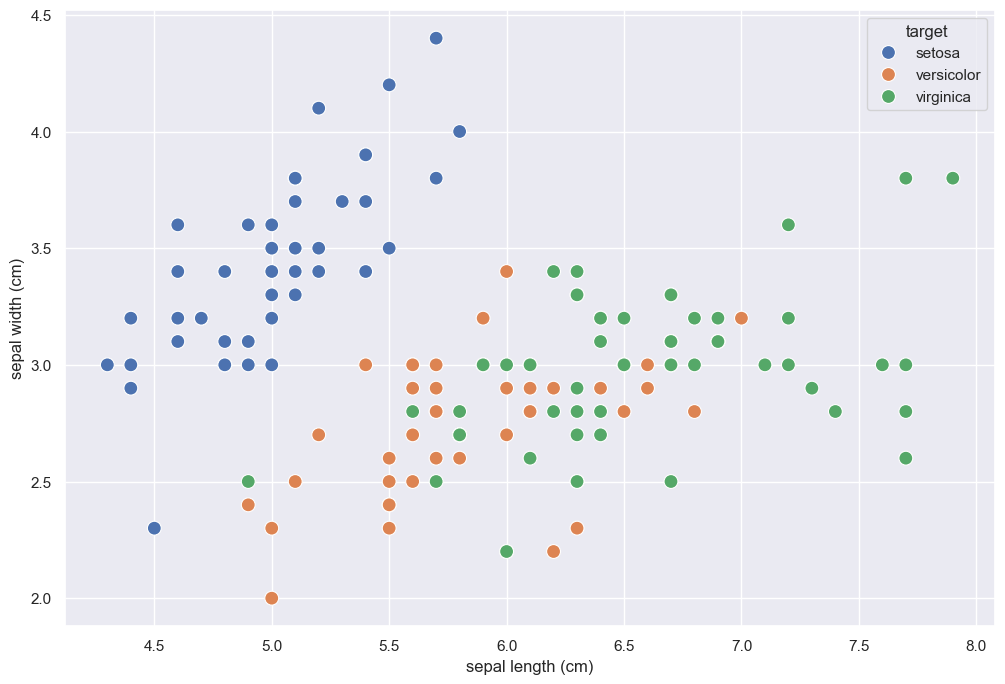

In [82]:
# this is better than the density graph
plt.figure(figsize=(12,8))
sns.scatterplot(x=iris_df['sepal length (cm)'],
                y=iris_df['sepal width (cm)'],
                hue = iris_df['target'],
               s=100);

[Documentación dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

% poblacion con poco poder adquisitivo vs media de habitaciones por vivienda

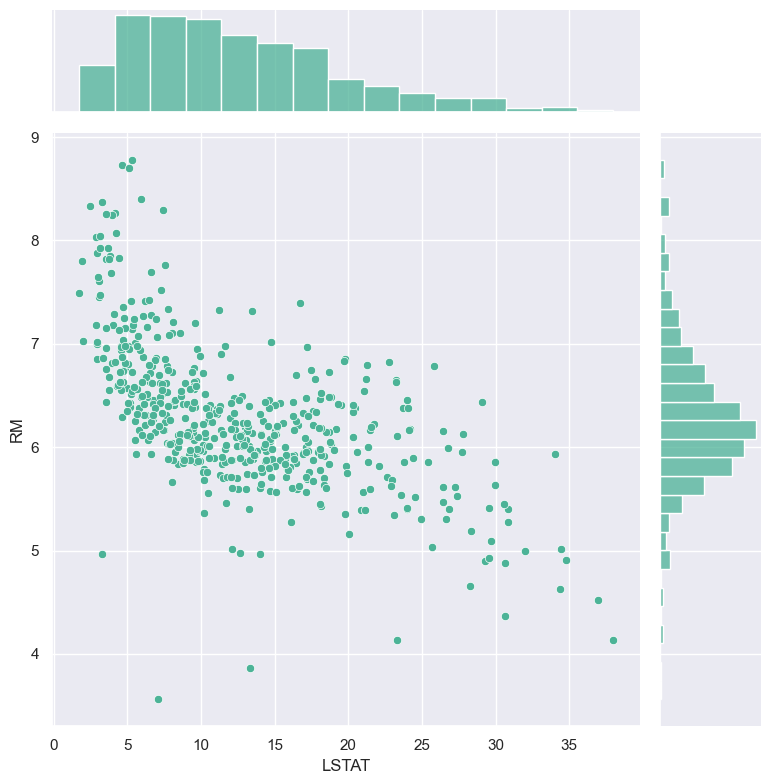

In [85]:
# this is one of the most useful graphs
'''create a joint plot with the LSTAT column on the x-axis and the RM column on the y-axis.
 The resulting plot will have a hexagonal bin plot of the data points with a color of #4CB391. 
 The height of the plot will be 8 inches.'''

sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              color="#4CB397",
             height = 8);

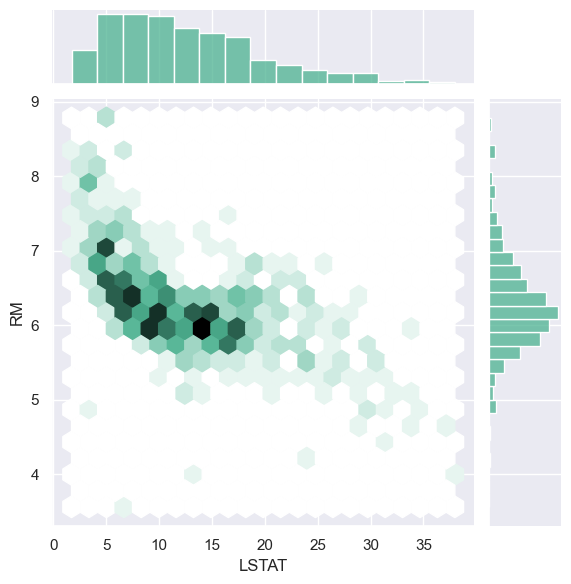

In [86]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="hex",
              color="#4CB391");

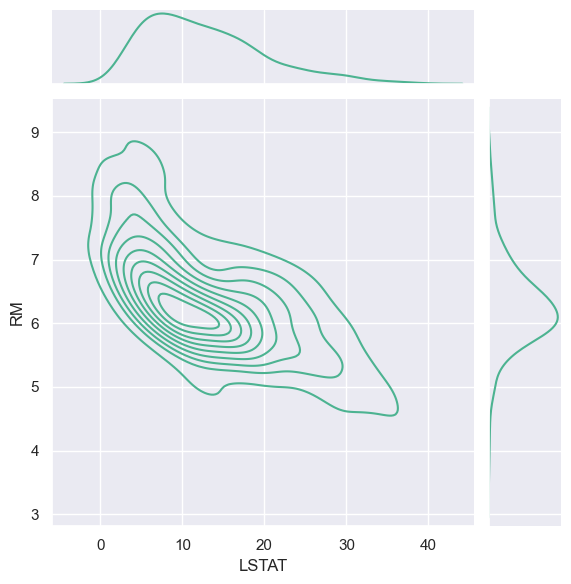

In [87]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="kde",
              color="#4CB391");

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
'''computes the pairwise correlation of columns, excluding NA/null values. 
The resulting output is a correlation matrix that shows the correlation coefficients between each pair of columns
The correlation coefficient is a value between -1 and 1 that indicates the strength of the linear relationship
 between two variables. 
 A value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation,
   and a value of 0 indicates no correlation.'''

boston_df.corr()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(boston_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

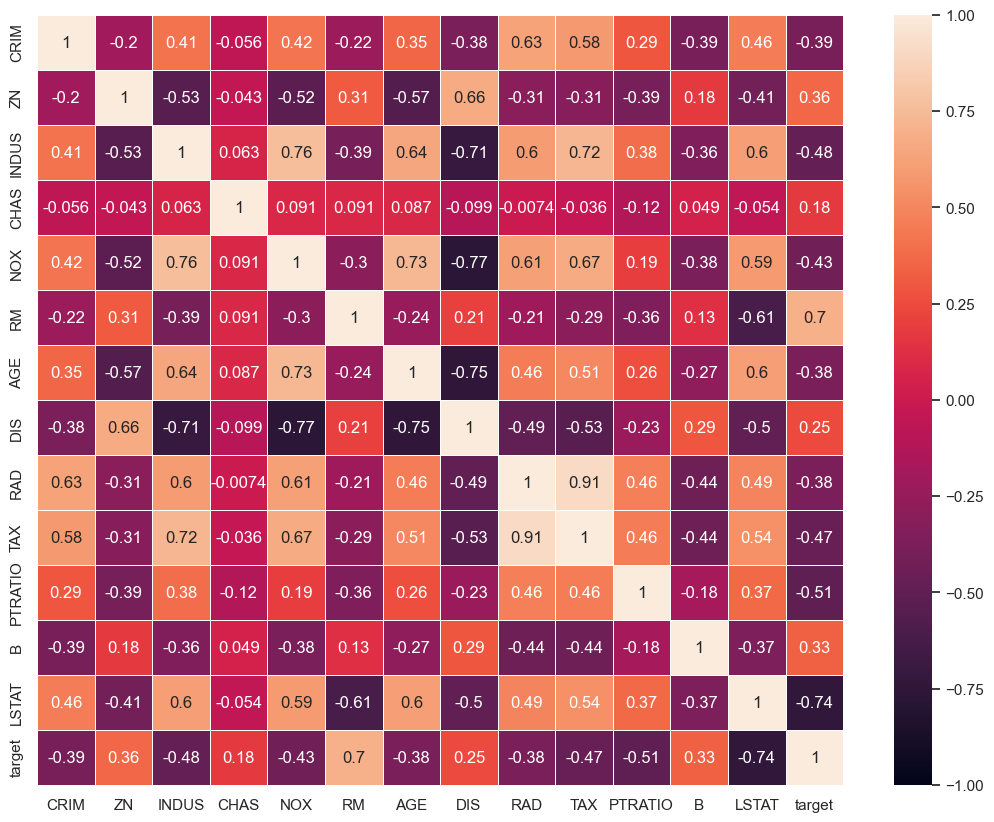

In [88]:
# EJEMPLO DE MALA ESCALA DE COLORES, commit this graph to memory to correlation graphs!! 
# it is uded all teh time and gives tons of info 
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(boston_df.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1);

También nos permite comparar una variable numérica vs dos variables categóricas. Por ejemplo la cantidad de suicidios desagregado por edades y paises.

Se recomienda que las dos variables categóricas tengan pocos casos, porque sino no se va a ver bien el heatmap.

In [89]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [91]:
data = suicid_df.groupby(['country', 'age']).sum()['suicides_no'].unstack()
data = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic']]

In [ ]:
data

In [ ]:
'''The pivot_table() function creates a spreadsheet-style pivot table as a DataFrame. 
The index, columns, and values parameters specify the columns to use for the pivot table.
 The resulting output is a data frame with a hierarchical index that shows
   the total number of suicides for each country and age group.

The second line of code selects only the rows with countries 
Italy, Spain, Portugal, Belgium, and Czech Republic. 
The resulting data frame will only contain data for these countries.'''

data = suicid_df.pivot_table(index='country', columns='age', values='suicides_no')
data = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic']]

In [ ]:
'''plt.figure(figsize=(10,10)): 
creates a new figure with a size of 10 inches by 10 inches.

sns.heatmap(data, square=True, linewidths=.3, annot=True): 
creates a heatmap using the data variable. 
The square parameter specifies that each cell in the heatmap should be square-shaped. 
The linewidths parameter specifies the width of the lines that will divide each cell.
 The annot parameter specifies that the data values should be written in each cell.

create a heatmap with the specified dimensions and data. 
The resulting plot will have the data values written in each cell, 
and the cells will be square-shaped with a width of 0.3. '''

plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3,
            annot=True);

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas variables porque no se va a ver bien. Hazlo por partes.

In [93]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
sns.scatterplot(iris_df['petal length (cm)'], iris_df['petal width (cm)'])


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
sns.pairplot(iris_df);

In [ ]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="target",
             plot_kws=dict(s=80, edgecolor="white",
                           linewidth=2.5));

In [ ]:
# not much use
sns.pairplot(iris_df,
             kind="scatter",
             hue="target",
             diag_kind="hist");

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo, una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [ ]:
pd.crosstab(titanic_df["Embarked"],
            titanic_df["Sex"],
            margins = False) 

#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se entiende la representación de dos variables cualitativas

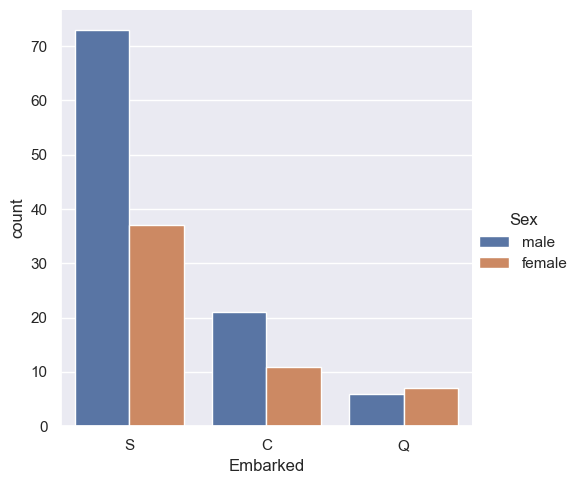

In [101]:
sns.catplot(x="Embarked",
            hue="Sex",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=titanic_df);

Otra manera de visualizar dos o más variables categóricas

<Figure size 3000x1000 with 0 Axes>

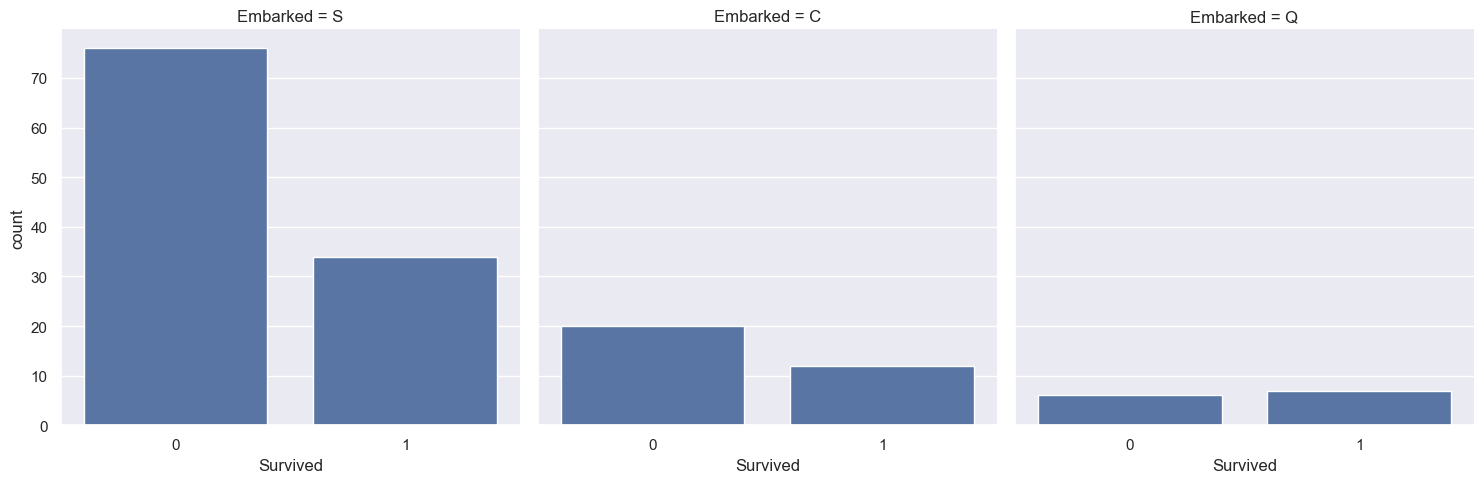

In [99]:
plt.figure(figsize=(30,10));
sns.catplot(x="Survived",
            col="Embarked",
            col_wrap=3,
            data=titanic_df,
            kind="count");

In [ ]:
titanic_df.groupby(['Embarked','Sex'])['Survived'].sum()

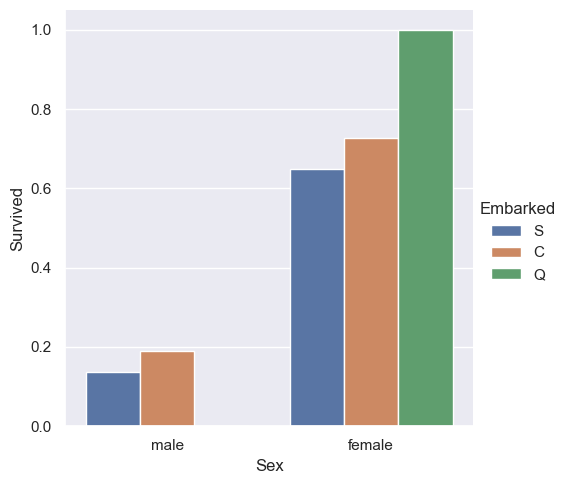

In [102]:
sns.catplot(x="Sex",
            y="Survived",
            hue="Embarked",
            kind="bar",
            data=titanic_df,
            ci=None); # Para que elimine las barras de error

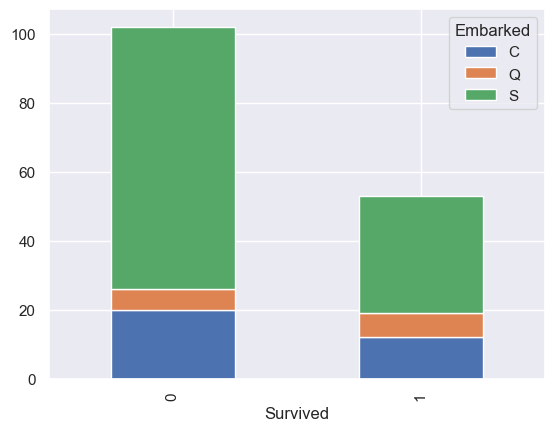

In [103]:
# stacker graph has lots of applications 
df_plot = titanic_df.groupby(['Embarked', 'Survived']).size().reset_index().pivot(columns='Embarked',
                                                                                  index='Survived',
                                                                                  values=0)
df_plot.plot(kind='bar', stacked=True);

### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [104]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]
suicid_df2 = suicid_df2.groupby(['country', 'year']).sum()
suicid_df2.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data=suicid_df2,
             x="year", # x axis is always time in this type of graph
             y="suicides_no",
             hue="country",
            linewidth = 5);

#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [ ]:
# !pip install squarify

In [ ]:
suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:30]

In [ ]:
pip install squarify

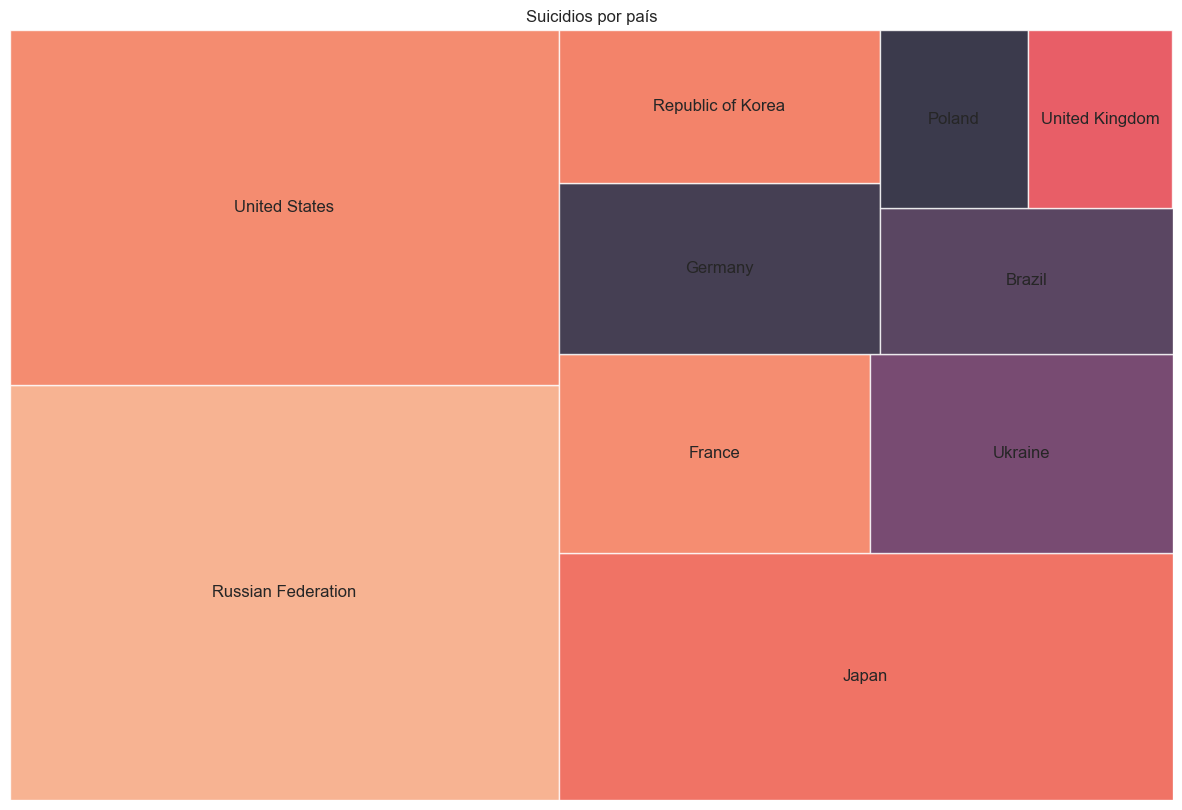

In [73]:
import squarify

data = suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:10]

plt.figure(figsize=(15,10))
squarify.plot(sizes=data.values, label=data.index, alpha=.8 )
plt.axis('off')
plt.title("Suicidios por país")
plt.show()

Con este catplot obtenemos la dispersión de la variable Age, por cada grupo de la categoría.

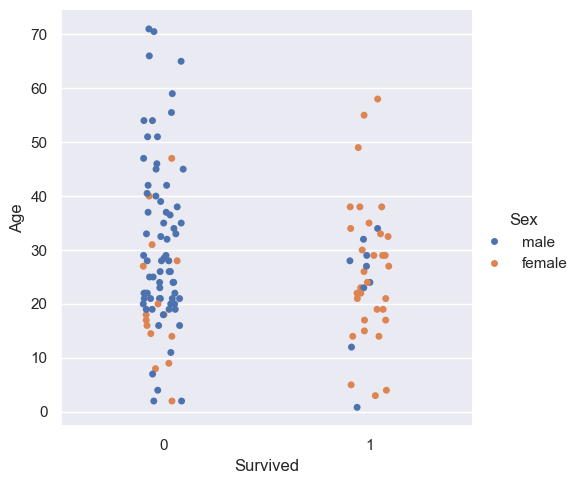

In [106]:
sns.catplot(x="Survived", y="Age", hue="Sex", data=titanic_df);

El equivalente con un diagrama de caja sería el siguiente

In [66]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [ ]:
# titanic_df['Survived_string'] = np.where(titanic_df['Survived']==1, 'Superviviente', 'No superviviente')
# titanic_df.head()

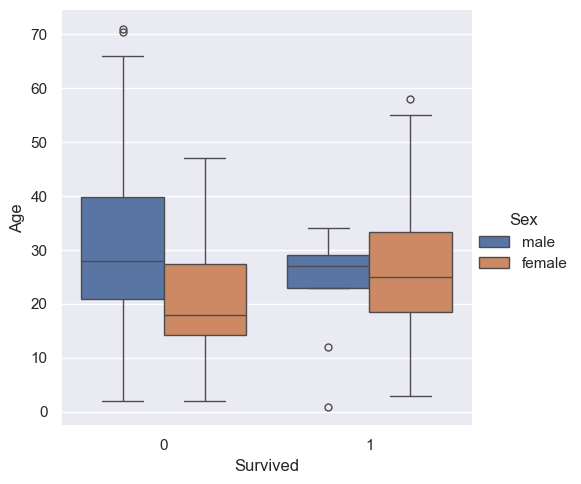

In [107]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df); # lots of different kinds on the kind parameter

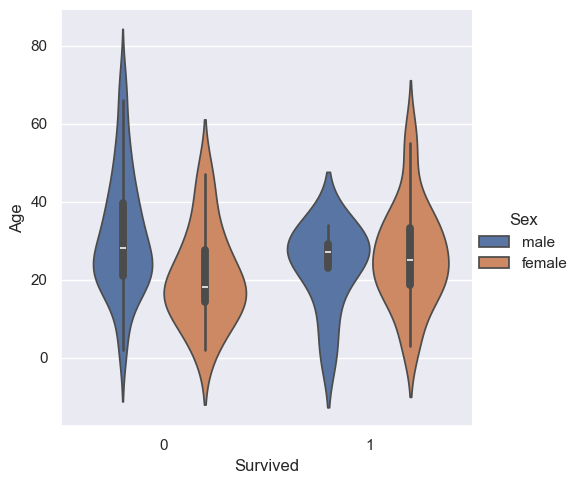

In [108]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

In [ ]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split=True, data=titanic_df);

In [ ]:
sns.catplot(x="City", y="Total", kind="swarm", data=market_df);

In [ ]:
sns.catplot(x="Survived",
            y="Fare",
            hue="Sex",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

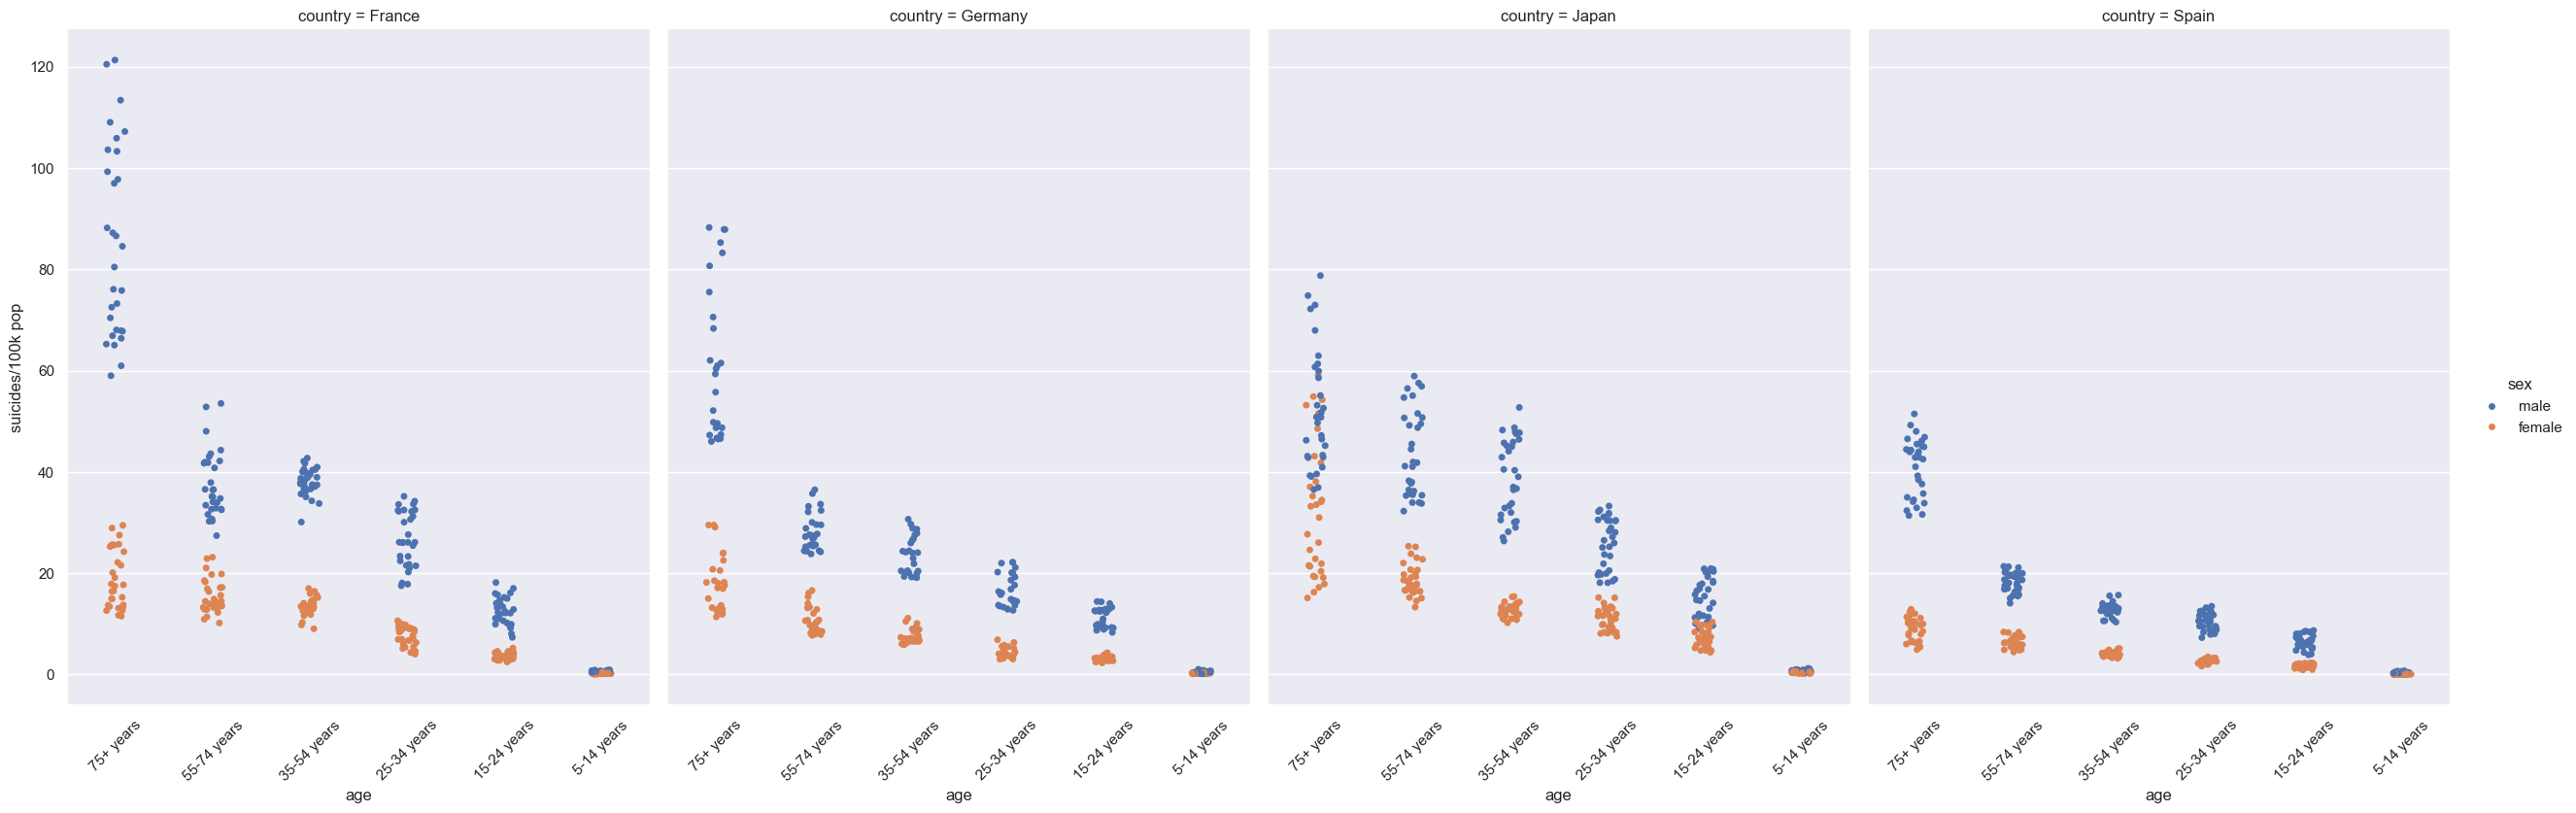

In [109]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France', 'Japan'])]

chart = sns.catplot(x="age",
            y="suicides/100k pop",
            hue="sex",
            col="country",
            data=suicid_df2,
            height=8,
            aspect=.8)
chart.set_xticklabels(rotation=45);

In [ ]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            col="Survived",
            bw=.1,
            height=8,
            aspect=.8,
            data=titanic_df);

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(
   data=titanic_df, x="Fare", hue="Embarked",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

In [ ]:
suicid_df2 = suicid_df[suicid_df['country'] == 'Spain']

plt.figure(figsize=(20,8))
sns.barplot(x="year",
            y="suicides_no",
            palette="Blues_d",
            data=suicid_df2,
           ci=None);

In [64]:
# Filter countries with 'gdp_per_capita > 10000
df1 = suicid_df.groupby('country').sum()['suicides_no']
df2 = suicid_df[suicid_df['gdp_per_capita ($)'] > 10000].groupby('country').sum()['suicides_no']
df1 = df1[df1.index.isin(df2.index)]

df_tot = pd.DataFrame({"Tot_suicide": df1, "Suicide_gdp": df2}).sort_values("Tot_suicide", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

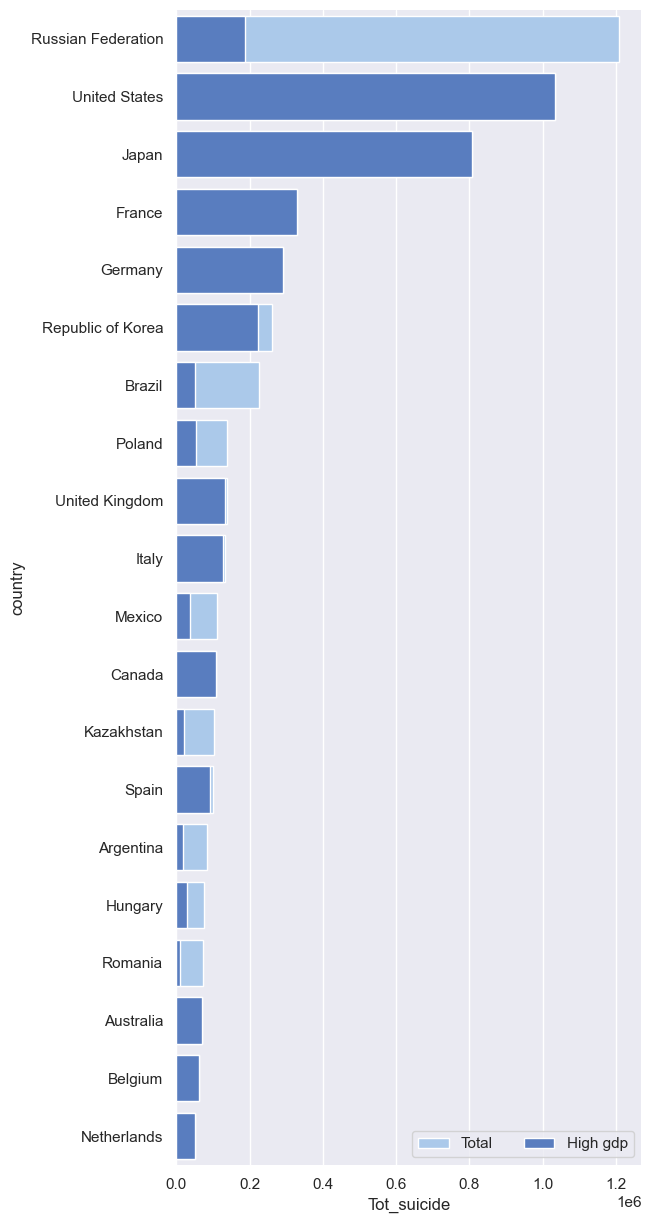

In [65]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Tot_suicide", y="country", data=df_tot,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Suicide_gdp", y="country", data=df_tot,
            label="High gdp", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

#### Bubble chart

In [61]:
suicid_df[suicid_df['country-year'] == 'Spain2002']

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
23732,Spain,2002,male,75+ years,498,1171341,42.52,Spain2002,NaN,"705,145,868,624",17924,Silent
23733,Spain,2002,male,55-74 years,688,3804296,18.08,Spain2002,NaN,"705,145,868,624",17924,Silent
23734,Spain,2002,male,35-54 years,752,5784305,13.00,Spain2002,NaN,"705,145,868,624",17924,Boomers
23735,Spain,2002,male,25-34 years,414,3566812,11.61,Spain2002,NaN,"705,145,868,624",17924,Generation X
23736,Spain,2002,female,75+ years,154,1934508,7.96,Spain2002,NaN,"705,145,868,624",17924,Silent
23737,Spain,2002,male,15-24 years,196,2855801,6.86,Spain2002,NaN,"705,145,868,624",17924,Millenials
23738,Spain,2002,female,55-74 years,268,4260724,6.29,Spain2002,NaN,"705,145,868,624",17924,Silent
23739,Spain,2002,female,35-54 years,245,5794565,4.23,Spain2002,NaN,"705,145,868,624",17924,Boomers
23740,Spain,2002,female,25-34 years,103,3417162,3.01,Spain2002,NaN,"705,145,868,624",17924,Generation X
23741,Spain,2002,female,15-24 years,46,2719911,1.69,Spain2002,NaN,"705,145,868,624",17924,Millenials


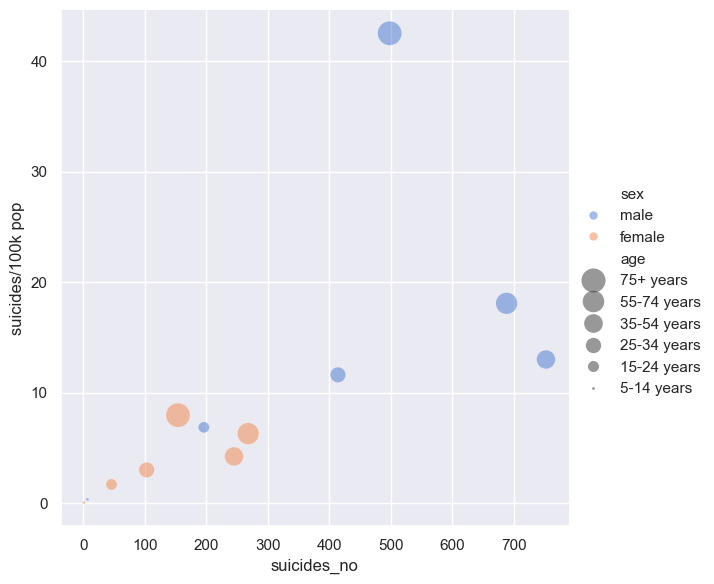

In [110]:
suicid_df2 = suicid_df[suicid_df['country-year'] == 'Spain2002']

sns.relplot(data=suicid_df2,
            x="suicides_no",
            y="suicides/100k pop",
            hue="sex", size="age",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);

#### 